In [181]:
%load_ext autoreload
%autoreload 2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
y_train = to_categorical(y_train, 10)
test_data = (x_test, y_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [316]:
from neural_network import Network as nn
from layers import Dense, Conv, Flatten

layers = [
    Conv(input_shape=(28, 28), kernel_shape=(5, 5), n_kernels=1),
    #Conv(input_shape=(26, 26), kernel_shape=(3, 3), n_kernels=1),
    Dense(576, 10),
    Dense(10, 10, initialization="xavier", activation="sigmoid")
]

net = nn(layers)

In [ ]:
A = np.random.rand((1,3,3))

In [318]:
net.fit(x_train, y_train, 10, 0.01, 32, test_data)

  0%|                                     | 0/1875 [00:00<?, ?it/s]


ValueError: shapes (10,10,32) and (32,10,10) not aligned: 32 (dim 2) != 10 (dim 1)

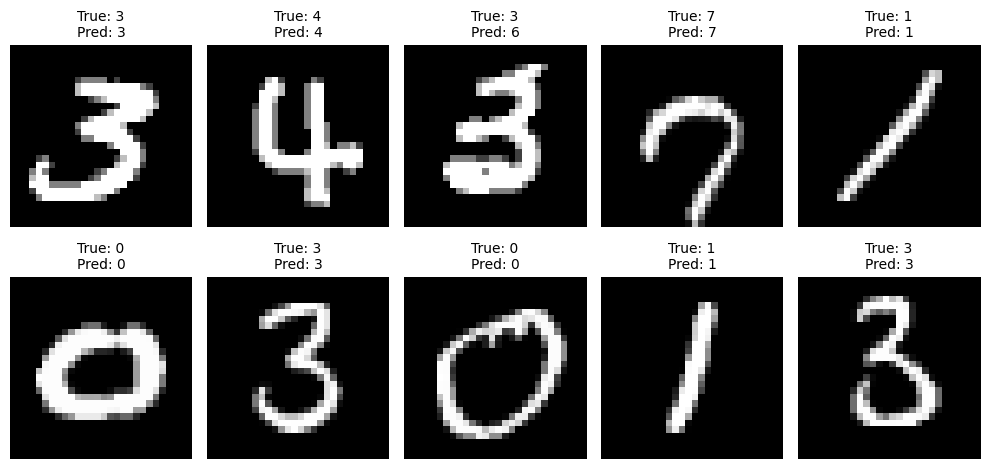

In [239]:
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

rnd_indices = np.random.randint(0, len(x_test), size=num_rows * num_cols)

for i, ax in enumerate(axes.flat):
    idx = rnd_indices[i]
    ax.imshow(x_test[idx].reshape((28, 28)), cmap='gray')
    ax.axis('off')
    
    y_true = y_test[idx]
    y_pred = np.argmax(net.predict(x_test[idx]))
    
    ax.set_title(f"True: {y_true}\nPred: {y_pred}", fontsize=10)

plt.tight_layout()
plt.show()